In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load your CSV file (update the filename if needed)
df = pd.read_csv("tableau_ready_sentiment_data.csv") 

In [2]:
df.head()

,tweet_id,date,tweet_body,roberta_sentiment,roberta_pos_score,roberta_neg_score,roberta_neu_score,sentiment_polarity,like_count,retweet_count,engagement_score,Open,Close,pct_change
0,1655978502187778073,2023-05-09,Yup,neutral,0.290412,0.215288,0.494300,0.075124,39533,3255,42788,168.949997,169.149994,0.118376
1,1655968899903418373,2023-05-09,Massive public manipulation,negative,0.009549,0.723850,0.266601,-0.714301,49528,9811,59339,168.949997,169.149994,0.118376
2,1646228474628280326,2023-04-12,🤣🤣,neutral,0.310404,0.235308,0.454288,0.075095,108462,10198,118660,190.740005,180.539993,-5.347600
3,1640171198091866114,2023-03-27,Prescient,neutral,0.204723,0.126566,0.668711,0.078156,56272,9193,65465,194.419998,191.809998,-1.342455
4,1742235895166652609,2024-01-02,Congratulations Tesla team on a great year!!,positive,0.991541,0.001338,0.007122,0.990203,67751,5222,72973,250.080002,248.419998,-0.663789


In [3]:


# Select features and target
features = [
    "roberta_pos_score",
    "roberta_neg_score",
    "roberta_neu_score",
    "sentiment_polarity",
    "engagement_score"
]
target = "pct_change"

# Drop rows with missing values
df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Save model
joblib.dump(model, "model.pkl")
print("✅ model.pkl saved!")




MAE: 2.4866636207893396
MSE: 9.762709049621808
R²: -0.10535524522715622
✅ model.pkl saved!


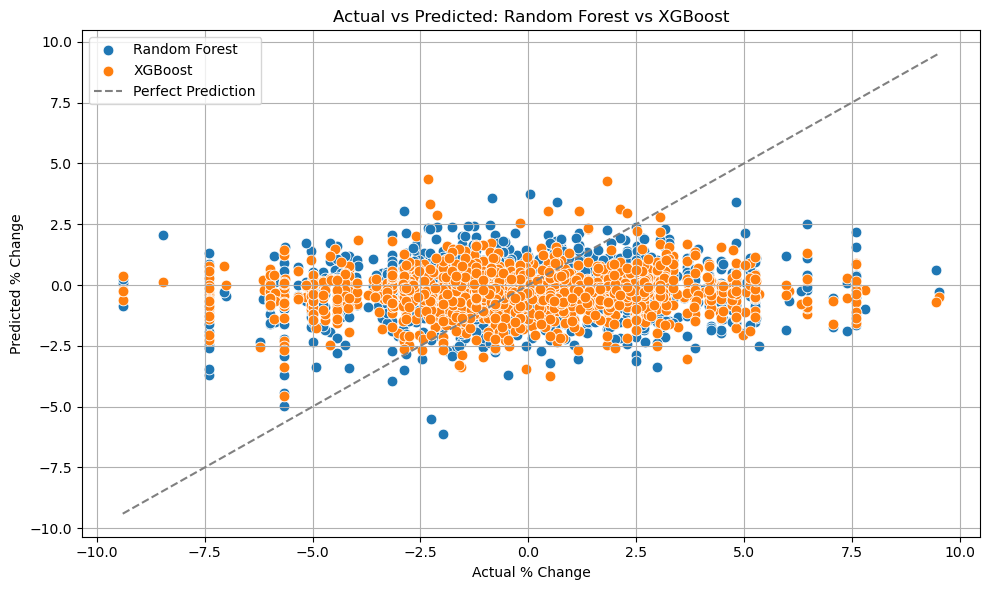

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Select features and target
features = [
    "roberta_pos_score",
    "roberta_neg_score",
    "roberta_neu_score",
    "sentiment_polarity",
    "engagement_score"
]
X = df[features].dropna()
y = df["pct_change"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_preds, label='Random Forest', s=60)
sns.scatterplot(x=y_test, y=xgb_preds, label='XGBoost', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray', label='Perfect Prediction')
plt.xlabel("Actual % Change")
plt.ylabel("Predicted % Change")
plt.title("Actual vs Predicted: Random Forest vs XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
